# Tamer Kanak - 201805069

**Importing Dataset**

In [39]:
import pandas as pd
import numpy as np
data = pd.read_csv("data2.csv", sep=";")

**Detect duplicate rows by excluding Foreign Currency and Date of Currency columns**


In [40]:
duplicate_rows = data.duplicated(subset=data.columns.difference(['Foreign Currency', 'Date of Currency']))
print(duplicate_rows.value_counts())

False    2412
True      767
dtype: int64


**Remove duplicate rows according to the duplicate\_rows variable.**


In [41]:
data.drop_duplicates(subset=data.columns.difference(['Foreign Currency', 'Date of Currency']), inplace=True)

In [42]:
print(data.isnull().sum())

Model                     0
Brand                     0
Price                     0
Foreign Currency          0
Date of Currency          0
Gear                      0
Fuel                      0
Engine Displacement       0
Transmission              0
Horsepower                0
Mortgage                  0
Confiscation              0
Inspection                0
Year                      0
Km                        0
Area of Use               0
Colour                    0
Top Speed                30
Luggage Volume          144
0-100                  2412
Max Torque               40
Cylinder                 24
Tank                     24
Consumption               0
Valve                   767
Kaput                     0
Tavan                     0
Ön Tampon                 0
Arka Tampon               0
Sağ Ön Çamurluk           0
Sağ Ön Kapı               0
Sağ Arka Kapı             0
Sağ Arka Çamurluk         0
Sol Ön Çamurluk           0
Sol Ön Kapı               0
Sol Arka Kapı       

In [43]:
data.head()

,Model,Brand,Price,Foreign Currency,Date of Currency,Gear,Fuel,Engine Displacement,Transmission,Horsepower,...,Ön Tampon,Arka Tampon,Sağ Ön Çamurluk,Sağ Ön Kapı,Sağ Arka Kapı,Sağ Arka Çamurluk,Sol Ön Çamurluk,Sol Ön Kapı,Sol Arka Kapı,Sol Arka Çamurluk
0,a3,audi,1278000,30,11.01.2024,tiptronic,benzin,"1,5",önden çekiş,150,...,çizik,çizik,saglam,saglam,saglam,saglam,saglam,saglam,saglam,"lokal boyalı, çizik"
1,a3,audi,1274000,30,11.01.2024,tiptronic,benzin,"1,5",önden çekiş,150,...,"boyalı, çizik",çizik,çizik,saglam,saglam,ezik,saglam,saglam,saglam,saglam
2,caravelle,volkswagen,1687000,30,11.01.2024,otomatik,dizel,2,4x4,199,...,çizik,çizik,saglam,ezik,saglam,çizik,ezik,ezik,saglam,ezik
3,passat,volkswagen,1460000,30,11.01.2024,otomatik,dizel,"1,6",önden çekiş,120,...,saglam,saglam,saglam,saglam,saglam,saglam,saglam,boyalı,boyalı,saglam
4,passat,volkswagen,1457500,30,11.01.2024,otomatik,dizel,"1,6",önden çekiş,120,...,saglam,saglam,saglam,saglam,saglam,saglam,saglam,saglam,boyalı,boyalı


In [44]:
print(data["Price"].describe())

count    2.412000e+03
mean     1.357214e+06
std      1.223628e+06
min      3.619000e+05
25%      8.315000e+05
50%      1.058500e+06
75%      1.435900e+06
max      2.275000e+07
Name: Price, dtype: float64


**Encoding the Engine Displacement column**


In [45]:
data["Engine Displacement"] = data["Engine Displacement"].str.replace(",",".")
data["Engine Displacement"] = data["Engine Displacement"].dropna().astype(float)

In [46]:
print(data["Mortgage"].value_counts())
print(data["Confiscation"].value_counts())

hayır    2386
var        26
Name: Mortgage, dtype: int64
hayır    2397
var        15
Name: Confiscation, dtype: int64


**Since there are too many dominant values in the Mortgage and Confiscation columns, I remove them from the dataset.**


In [47]:
data.drop(columns=["Mortgage","Confiscation"], inplace = True)

In [48]:
print(data["Gear"].value_counts())

tiptronic      1220
otomatik        714
manuel          422
multitronic      56
Name: Gear, dtype: int64


In [49]:
print(data["Fuel"].value_counts())

benzin      1455
dizel        913
elektrik      24
lpg           20
Name: Fuel, dtype: int64


**Label encoding of Model and Brand column**


In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder_1 = LabelEncoder()
label_encoder_2 = LabelEncoder()

data['Model'] = label_encoder_1.fit_transform(data['Model'])
data['Brand'] = label_encoder_2.fit_transform(data['Brand'])

**One hot encoding of Gear and Fuel columns**


In [51]:
one_hot_encoded = pd.get_dummies(data["Gear"], prefix="Gear")
one_hot_encoded = one_hot_encoded.astype(int)
one_hot_encoded = one_hot_encoded.iloc[:,:-1]

data = data.drop(columns=["Gear"])
data = pd.concat([data.iloc[:, :5], one_hot_encoded, data.iloc[:, 5:]], axis=1)

In [52]:
one_hot_encoded = pd.get_dummies(data["Fuel"], prefix="Fuel")
one_hot_encoded = one_hot_encoded.astype(int)
one_hot_encoded = one_hot_encoded.iloc[:,:-1]

data = data.drop(columns=["Fuel"])
data = pd.concat([data.iloc[:, :8], one_hot_encoded, data.iloc[:, 8:]], axis=1)

In [53]:
print(data["Transmission"].value_counts())

önden çekiş      2155
4x4               199
arkadan i̇tiş      58
Name: Transmission, dtype: int64


**Since there are too many dominant values, we remove them from the dataset**


In [54]:
data = data.drop(columns=["Transmission"]) 

In [55]:
data["Consumption"]

0        6.2 (şi̇) / 4.3 (şd)
1          6 (şi̇) / 4.1 (şd)
2       10.7 (şi̇) / 7.3 (şd)
3        4.6 (şi̇) / 3.8 (şd)
4        4.6 (şi̇) / 3.8 (şd)
                ...          
3171       6 (şi̇) / 4.4 (şd)
3172     7.4 (şi̇) / 5.2 (şd)
3174     4.1 (şi̇) / 3.8 (şd)
3176     4.6 (şi̇) / 3.8 (şd)
3178     7.2 (şi̇) / 5.9 (şd)
Name: Consumption, Length: 2412, dtype: object

**Extracting City Consumption and Highway Consumption values in Consumption column.**


In [56]:
consumption_split = data['Consumption'].str.split('/', expand=True)

# Let's take the consumption values separately in the city and highway
city_consumption = consumption_split[0].str.extract('(\d+(\.\d+)?)')
highway_consumption = consumption_split[1].str.extract('(\d+(\.\d+)?)')

# Convert consumption values to numeric values
city_consumption = city_consumption[0].astype(float)
highway_consumption = highway_consumption[0].astype(float)

In [57]:
print(city_consumption)
print(highway_consumption)

0        6.2
1        6.0
2       10.7
3        4.6
4        4.6
        ... 
3171     6.0
3172     7.4
3174     4.1
3176     4.6
3178     7.2
Name: 0, Length: 2412, dtype: float64
0       4.3
1       4.1
2       7.3
3       3.8
4       3.8
       ... 
3171    4.4
3172    5.2
3174    3.8
3176    3.8
3178    5.9
Name: 0, Length: 2412, dtype: float64


In [58]:
data['City Consumption'] = city_consumption
data['Highway Consumption'] = highway_consumption

In [59]:
data = pd.concat([data.iloc[:, :24], data.iloc[:, 38:], data.iloc[:, 24:]], axis=1)
data = data.drop(columns=["Consumption"])
data = data.iloc[:,:39]

In [60]:
print(data['City Consumption'])
print(data['Highway Consumption'])

0        6.2
1        6.0
2       10.7
3        4.6
4        4.6
        ... 
3171     6.0
3172     7.4
3174     4.1
3176     4.6
3178     7.2
Name: City Consumption, Length: 2412, dtype: float64
0       4.3
1       4.1
2       7.3
3       3.8
4       3.8
       ... 
3171    4.4
3172    5.2
3174    3.8
3176    3.8
3178    5.9
Name: Highway Consumption, Length: 2412, dtype: float64


**If there is at least one damage in the damage columns, mark the car as damaged and delete the other columns. Reduce the damage to one column.**


In [61]:
for sutun in data.iloc[:,27:].columns:
    data[sutun] = (data[sutun] != 'saglam').astype(int)

damage_matrix = data.iloc[:, 27:].to_numpy()

damaged = np.any(damage_matrix, axis=1)

data["Damage"] = np.array(damaged, dtype=int)
data = data.drop(columns=data.iloc[:, 27:39].columns)

**Removal of unnecessary columns**


In [62]:
data.drop(columns=["Foreign Currency","Date of Currency","Inspection","Colour","0-100"],inplace=True)   

**Imputing some null values in the Luggage Volume column according to the Area of Use column**


In [63]:
nan_rows = data[data['Luggage Volume'].isnull()]
avg_luggage_volume_by_area = data.groupby('Area of Use')['Luggage Volume'].mean()
avg_luggage_volume_by_area = avg_luggage_volume_by_area.dropna().astype(int)

print(data.isnull().sum())

for index, row in nan_rows.iterrows():
    area = row['Area of Use']
    if area in avg_luggage_volume_by_area:
        data.at[index, 'Luggage Volume'] = avg_luggage_volume_by_area[area]

Model                    0
Brand                    0
Price                    0
Gear_manuel              0
Gear_multitronic         0
Gear_otomatik            0
Fuel_benzin              0
Fuel_dizel               0
Fuel_elektrik            0
Engine Displacement      0
Horsepower               0
Year                     0
Km                       0
Area of Use              0
Top Speed               30
Luggage Volume         144
Max Torque              40
Cylinder                24
Tank                    24
City Consumption         0
Highway Consumption      0
Valve                  767
Damage                   0
dtype: int64


**Imputing non\-imputable null values in the Luggage Volume column with KNNImputer**


In [64]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data[['Luggage Volume']] = imputer.fit_transform(data[['Luggage Volume']])

**Removal of unnecessary columns**


In [65]:
data.drop(columns=["Area of Use","Valve"],axis=1,inplace=True) # Valve column has too much null values

In [66]:
print(data.isnull().sum())

Model                   0
Brand                   0
Price                   0
Gear_manuel             0
Gear_multitronic        0
Gear_otomatik           0
Fuel_benzin             0
Fuel_dizel              0
Fuel_elektrik           0
Engine Displacement     0
Horsepower              0
Year                    0
Km                      0
Top Speed              30
Luggage Volume          0
Max Torque             40
Cylinder               24
Tank                   24
City Consumption        0
Highway Consumption     0
Damage                  0
dtype: int64


**Filling null values in Top Speed, Max Torque, Cylinder, Tank columns with KNNImputer**


In [67]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)

selected_columns = ["Top Speed", "Max Torque", "Cylinder", "Tank"]
data[selected_columns] = imputer.fit_transform(data[selected_columns])

Visualization section


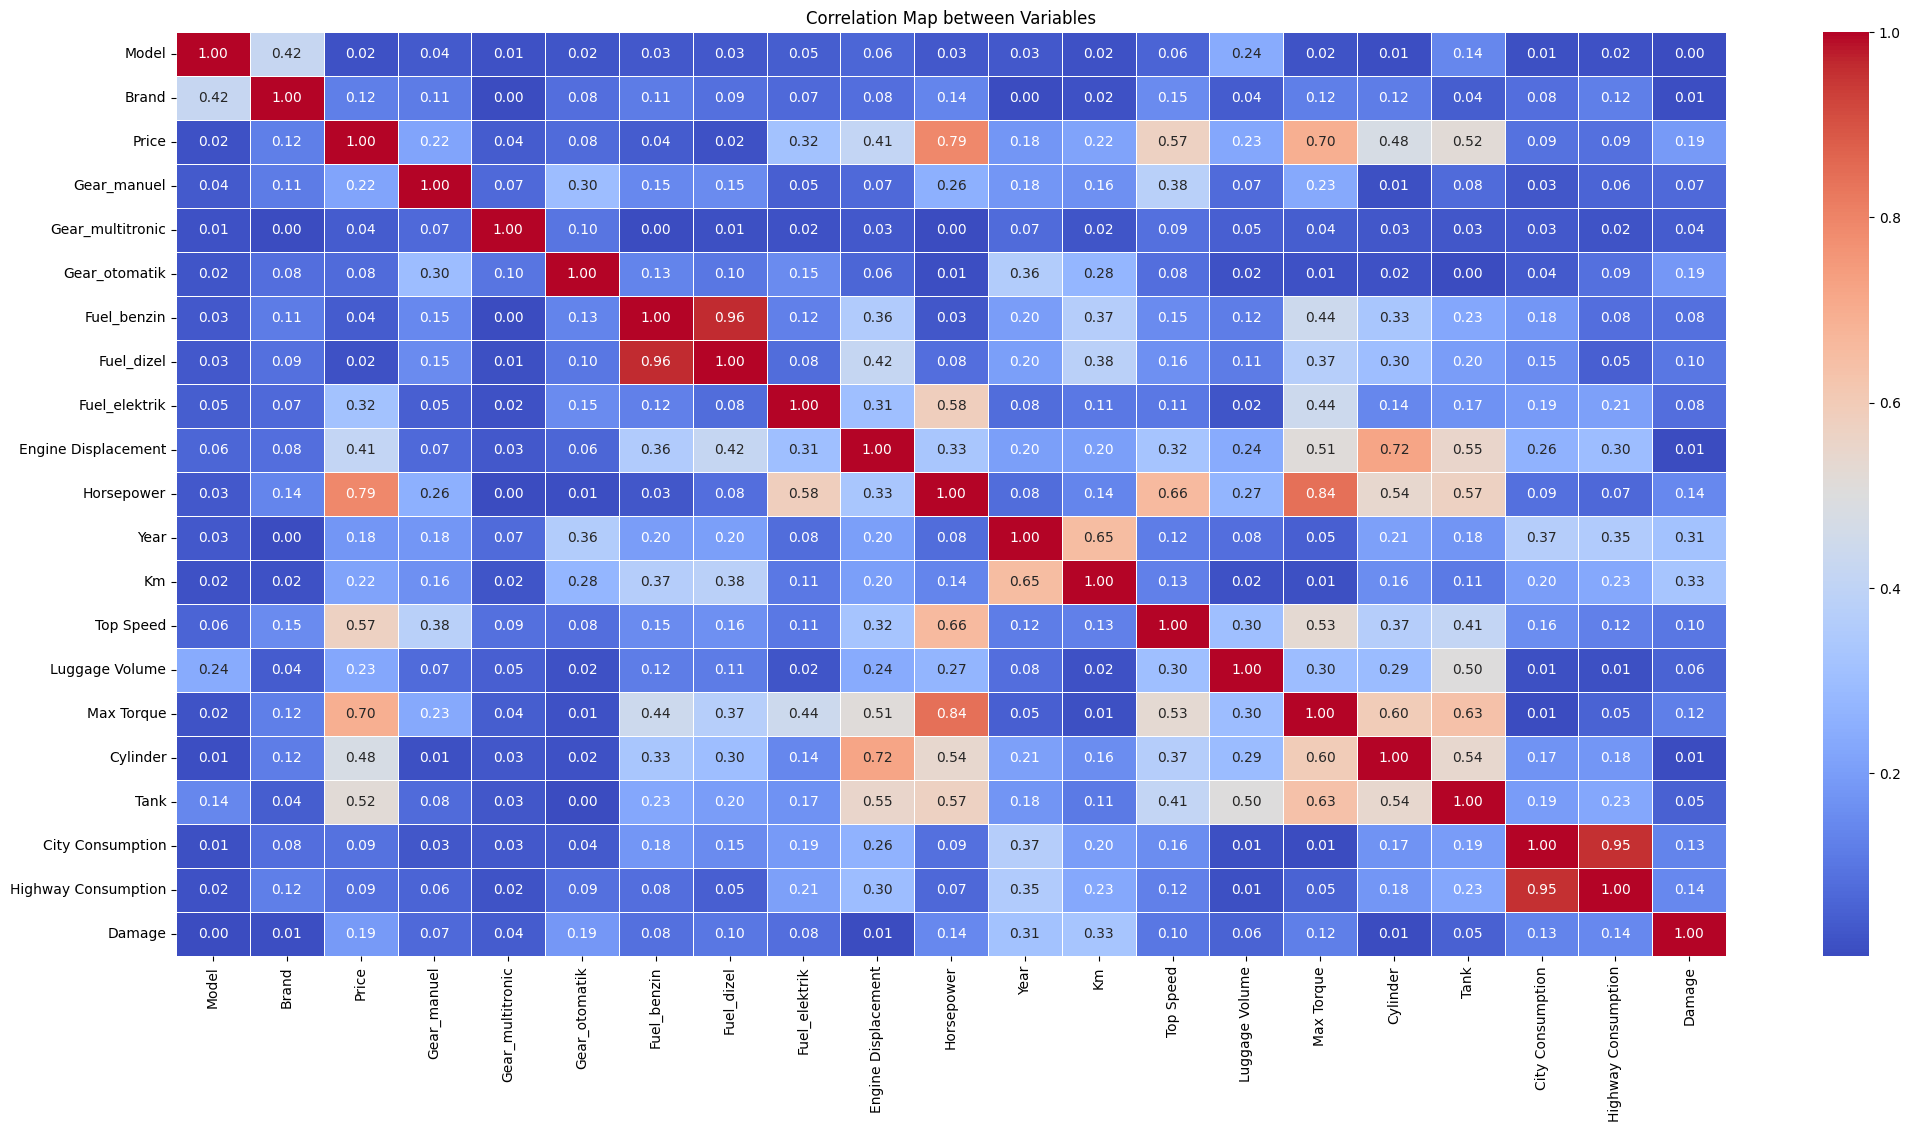

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = data.corr().abs()

# Visualise the correlation matrix
plt.figure(figsize=(25, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Map between Variables')
plt.show()

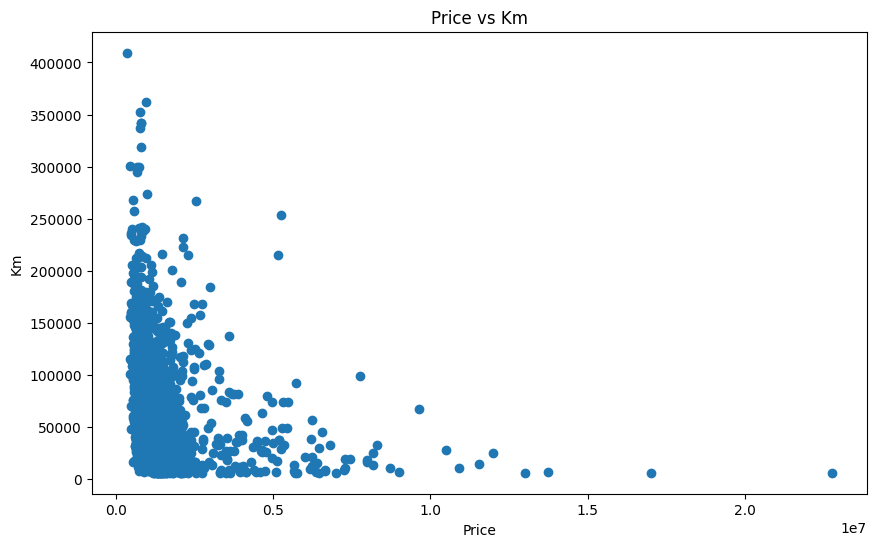

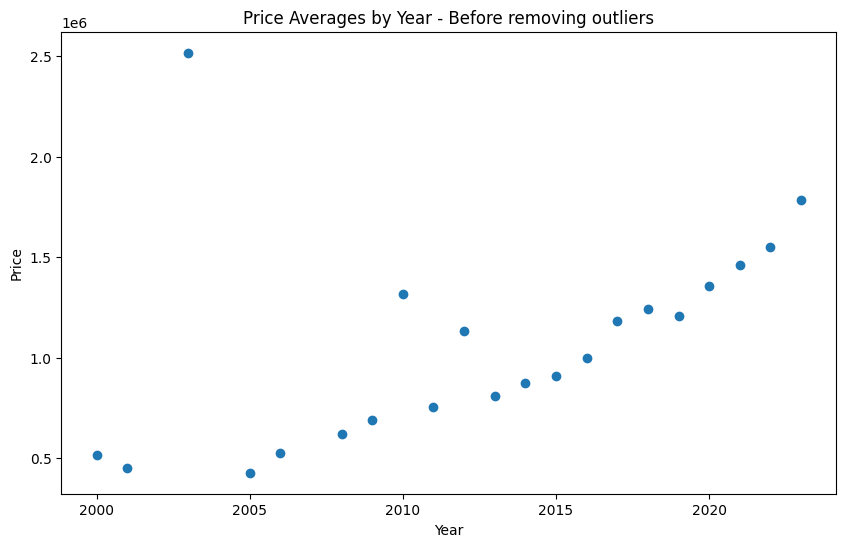

In [69]:
# Price vs Km scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Price'], data['Km'])
plt.title('Price vs Km')
plt.xlabel('Price')
plt.ylabel('Km')
plt.show()

# Calculate and sort "Price" averages by "Year" column.
yearPriceAvg = data.groupby("Year")["Price"].mean().sort_values()

# Create a chart.
plt.figure(figsize=(10, 6))
plt.scatter(yearPriceAvg.index, yearPriceAvg.values)
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Price Averages by Year - Before removing outliers")
plt.show()

**Removing outliers detected between Year and Price from the dataset**


In [70]:
outlierYear = data[(data['Year'] > 2000) & (data['Year'] < 2005) & (data['Price'] > 1500000)]
data = data.drop(outlierYear.index)

outlierYear = data[(data['Year'] >= 2010) & (data['Year'] < 2015) & (data['Price'] > 2500000)]
data = data.drop(outlierYear.index)

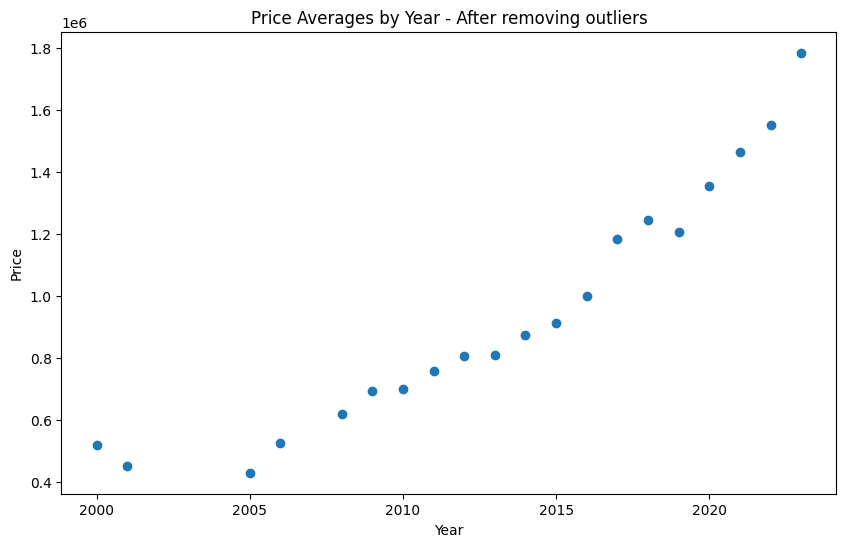

In [71]:
# Calculate and sort "Price" averages by "Year" column.
yearPriceAvg = data.groupby("Year")["Price"].mean().sort_values()

# Create a chart..
plt.figure(figsize=(10, 6))
plt.scatter(yearPriceAvg.index, yearPriceAvg.values)
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Price Averages by Year - After removing outliers")
plt.show()

**Deletion of columns that are highly correlated with each other**


In [72]:
data.drop("Highway Consumption",axis=1,inplace=True) # High correlation with City Consumption
data.drop("Max Torque",axis=1,inplace=True) # High correlation with Horsepower

**Installing the required algorithm**

In [73]:
!pip install xgboost

**The section where dependent and independent variables are assigned.**


In [74]:
X = data.drop(columns = ["Price"], axis=1)
y = data["Price"]

**Train and Test Split & Scaling**


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Importing the necessary regression algorithms**


In [76]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

regressors = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradien tBoosting Regression": GradientBoostingRegressor(),
    "Bayesian Regression": BayesianRidge(),
    "SVR": SVR(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "KNN Regression": KNeighborsRegressor(),
    "XGBRegressor": XGBRegressor()
}

**Model training with Cross Validation and measurement of success metrics**


In [77]:
for name, regressor in regressors.items():
    
    regressor.fit(X_train, y_train)

    # Make predictions on both training and testing sets
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)

    # Calculate R-squared scores for both training and testing sets
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print the model name, train R-squared, and test R-squared scores
    print(f"{name.upper()}:")
    print(f"Train R-Squared Score: {train_r2:.6f}")
    print(f"Test R-Squared Score: {test_r2:.6f}\n")
    
    print(name.upper())
    scores = cross_validate(regressor, X_train, y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'], cv = 10, return_train_score=True)
    scores = pd.DataFrame(scores, index=range(1,11))
        
    print(scores.iloc[:, 2:].mean().abs().apply("{:.6f}".format))
    
    print("_______________________________________________________________________")

LINEAR REGRESSION:
Train R-Squared Score: 0.736621
Test R-Squared Score: 0.605953

LINEAR REGRESSION
test_r2                                                0.702863
train_r2                                               0.737817
test_neg_mean_absolute_error                      347017.935074
train_neg_mean_absolute_error                     339888.946369
test_neg_mean_squared_error                 367175607253.272827
train_neg_mean_squared_error                340192052124.752502
test_neg_root_mean_squared_error                  576851.140679
train_neg_root_mean_squared_error                 582728.250208
test_neg_mean_absolute_percentage_error                0.285164
train_neg_mean_absolute_percentage_error               0.280585
dtype: object
_______________________________________________________________________
RIDGE REGRESSION:
Train R-Squared Score: 0.736619
Test R-Squared Score: 0.605860

RIDGE REGRESSION
test_r2                                                0.703094
train_r2  

test_r2                                               0.931787
train_r2                                              0.999122
test_neg_mean_absolute_error                     115859.654095
train_neg_mean_absolute_error                     23685.882088
test_neg_mean_squared_error                 92700265386.718475
train_neg_mean_squared_error                 1132813070.868411
test_neg_root_mean_squared_error                 280225.694103
train_neg_root_mean_squared_error                 33610.129456
test_neg_mean_absolute_percentage_error               0.078429
train_neg_mean_absolute_percentage_error              0.021107
dtype: object
_______________________________________________________________________
